### Phys 629: Statistical Tools for Physics Research
***Anuradha Gupta***

# Homework 8
### Due: Friday, Oct 27 at 11:59 pm CT

## Problem 1

This week's problem is worth 40 points. This problem uses a dataset in `/coursework/homeworks/hw_data/`.

1) Read in `hw8_data.npy`, which is a (3 x 20) numpy array. Set `x, y, sigma_y = data`. 

We're going to do some polynomial fits to this data just like in the lecture. However, in all cases you should **keep the $y$-intercept fixed at $-0.23$**. 

2) Use the following code to compute the un-normalized posterior pdf (i.e., just the likelihood x prior) on a grid of the linear coefficient (i.e., the slope) of a linear model, with a uniform prior between 0.5 and 1.5. Plot this posterior pdf. Remember this is just a one-dimensional model because the $y$-intercept is fixed. I advise a grid size of 100.

# 1.1 Load data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
from scipy.stats import norm
from scipy.integrate import simps

data = np.load('../../homeworks/hw_data/hw8_data.npy')
x, y, sigma_y = data

# 1.2 Compute un-normalized posterior on a frid of the linear coefficient of a linear model with a uniform prior between 0.5 and 1.5. Plot posterior pdf.

Text(0.5, 1.0, '1D Linear Model Posterior PDF')

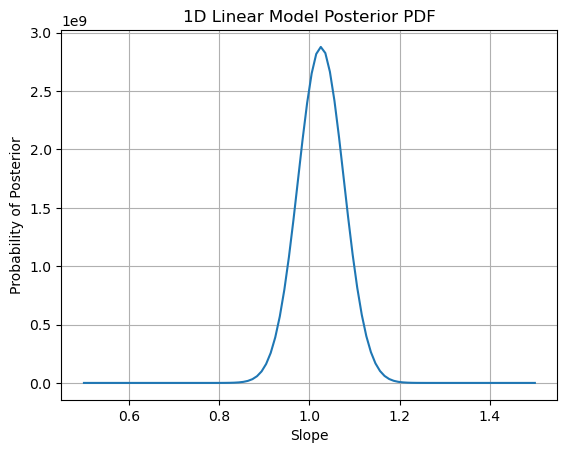

In [2]:
# Functions to do a polynomial fit and compute the likelihood
def polynomial_fit(theta, x):
    """Polynomial model of degree (len(theta) - 1)"""
    return sum(t * x ** n for (n, t) in enumerate(theta))

# Compute the data log-likelihood given a model
def logL(theta, data, model=polynomial_fit):
    """Gaussian log-likelihood of the model at theta"""
    x, y, sigma_y = data
    y_fit = model(theta, x)
    return sum(norm.logpdf(*args) for args in zip(y, y_fit, sigma_y))

linear_model = lambda theta, x: theta[0] + theta[1] * x

slope_range = np.linspace(0.5,1.5,100)
posterior_linear = np.exp([logL([-0.23, slope], data, model=linear_model) for slope in slope_range])

plt.plot(slope_range, posterior_linear)
plt.xlabel("Slope")
plt.ylabel("Probability of Posterior")
plt.grid()
plt.title("1D Linear Model Posterior PDF")

3) Using your 1D gridded likelihood x prior, compute the Bayesian evidence of this linear model. This may be a big number!

4) Now compute the joint 2D posterior pdf (again just the likelihood x prior) of linear and quadratic coefficients of a quadratic model. Give the linear coefficient a uniform prior between 0.5 and 1.5. Give the quadratic coefficient a uniform prior between -1 and 0.25. Plot this 1D posterior. Remember this is a two-dimensional model because the $y$-intercept is fixed. I advise a grid size of 100 in each model parameter dimension.

5) Using your 2D gridded likelihood x prior, compute the Bayesian evidence of the quadratic model. 

# 1.3 Compute the Bayesian evidence of the linear model

In [3]:
linear_evidence = simps(posterior_linear, slope_range)

print(f"Bayesian Evidence: {linear_evidence}")

Bayesian Evidence: 365684733.1606595


# 1.4 Compute the joint 2D posterior pdf od linear and quadratic coefficients of a quadratic model

In [ ]:
def quadratic_model(theta, x):
    linear_coef, quadratic_coef = theta
    return linear_coef * x + quadratic_coef * x ** 2

def logL(theta, data, model=quadratic_model):
    x, y, sigma_y = data
    y_fit = model(theta, x)
    return sum(norm.logpdf(y_i, y_fit_i, sigma_y_i) for y_i, y_fit_i, sigma_y_i in zip(y, y_fit, sigma_y))

# Define the priors
def linear_prior(linear_coef):
    return 1.0 if 0.5 <= linear_coef <= 1.5 else 0.0

def quadratic_prior(quadratic_coef):
    return 1.0 if -1.0 <= quadratic_coef <= 0.25 else 0.0

# Grid size
grid_size = 1000

# Create a meshgrid for linear and quadratic coefficients
linear_coef_vals = np.linspace(0.5, 1.5, grid_size)
quadratic_coef_vals = np.linspace(-1.0, 0.25, grid_size)
linear_coef, quadratic_coef = np.meshgrid(linear_coef_vals, quadratic_coef_vals)

# Initialize an array to store the un-normalized posterior values
posterior_values_2d = np.zeros_like(linear_coef)

# Loop over the grid and compute the un-normalized posterior
for i in range(grid_size):
    for j in range(grid_size):
        theta = [linear_coef_vals[i], quadratic_coef_vals[j]]
        posterior_values_2d[i, j] = linear_prior(theta[0]) * quadratic_prior(theta[1]) * np.exp(logL(theta, data))

# Plot the 2D posterior PDF
plt.contour(linear_coef, quadratic_coef, posterior_values_2d, levels=20, cmap='viridis')
plt.xlabel('Linear Coefficient')
plt.ylabel('Quadratic Coefficient')
plt.title('Joint 2D Posterior PDF')
plt.show()

# I don't know why this will not center.

 # 1.5 Compute the Bayesian evidence of the quadratic model 

In [ ]:
# Generate samples from the parameter space
num_samples = 100
linear_coef_samples = np.linspace(0.5, 1.5, num_samples)
quadratic_coef_samples = np.linspace(-1.0, 0.25, num_samples)

# Create a meshgrid for the samples
linear_coef, quadratic_coef = np.meshgrid(linear_coef_samples, quadratic_coef_samples)
theta_samples = np.column_stack((linear_coef.ravel(), quadratic_coef.ravel()))

# Compute the product of likelihood and prior for each sample
likelihood_prior_product = np.exp([logL(theta, data) + np.log(prior(theta)) for theta in theta_samples])

# Reshape the product array to match the meshgrid shape
likelihood_prior_product = likelihood_prior_product.reshape(linear_coef.shape)

# Integrate using Simpson's rule
evidence = simps(simps(likelihood_prior_product, quadratic_coef_samples), linear_coef_samples)

print("Bayesian Evidence (Simpson's rule):", evidence)